## Movie Recommendation Using Surprise Module

In [3]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163761 sha256=c7d11beccf4e8d09ddd078e49073011c45ceb6fc848e867b168e1f8da25fd227
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [41]:
import zipfile
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from surprise.model_selection import train_test_split
from surprise import SVD
from surprise.model_selection import GridSearchCV
from surprise import NMF
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader


In [42]:

# Download and extract MovieLens 100K dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
urllib.request.urlretrieve(url, 'movielens.zip')

with zipfile.ZipFile('movielens.zip', 'r') as zip_ref:
    zip_ref.extractall('movielens_data_folder')

# Load MovieLens 100K dataset - u.data file
data = pd.read_csv('movielens_data_folder/ml-100k/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# Load the dataset using Surprise
reader = Reader(rating_scale=(1, 5))  # Set the rating scale
surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [43]:
# Use the full dataset for training (no splitting)
train_set = surprise_data.build_full_trainset()

# Use Singular Value Decomposition (SVD) algorithm for recommendations
model = SVD()
model.fit(train_set)
# Load the movie information
movies_info = pd.read_csv('movielens_data_folder/ml-100k/u.item', sep='|', encoding='latin-1', header=None)
movies_info = movies_info.iloc[:, :2]  # Keep only movie ID and title columns
movies_info.columns = ['movieId', 'title']

In [44]:
# Get top 10 movie recommendations for user 5 (change user ID as needed)
user_id = '5'
top_n = 10

# Predict ratings for all movies for the user
user_movies = movies_info[~movies_info['movieId'].isin(train_set.ur[int(user_id)])]['movieId']
predictions = [model.predict(user_id, movie_id) for movie_id in user_movies]

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Print top N recommendations with movie names
print(f"Top {top_n} recommended movies for user {user_id} (with predicted ratings):")
for prediction in predictions[:top_n]:
    movie_id = prediction.iid
    movie_title = movies_info[movies_info['movieId'] == movie_id]['title'].values[0]
    print(f"Movie ID: {movie_id} - Movie Title: {movie_title} - Predicted Rating: {prediction.est}")

Top 10 recommended movies for user 5 (with predicted ratings):
Movie ID: 408 - Movie Title: Close Shave, A (1995) - Predicted Rating: 4.600002177690479
Movie ID: 318 - Movie Title: Schindler's List (1993) - Predicted Rating: 4.563884517081006
Movie ID: 169 - Movie Title: Wrong Trousers, The (1993) - Predicted Rating: 4.5532045515315245
Movie ID: 64 - Movie Title: Shawshank Redemption, The (1994) - Predicted Rating: 4.533098639794476
Movie ID: 483 - Movie Title: Casablanca (1942) - Predicted Rating: 4.513906724249775
Movie ID: 114 - Movie Title: Wallace & Gromit: The Best of Aardman Animation (1996) - Predicted Rating: 4.488967082581868
Movie ID: 603 - Movie Title: Rear Window (1954) - Predicted Rating: 4.4714091330411
Movie ID: 12 - Movie Title: Usual Suspects, The (1995) - Predicted Rating: 4.460026146196614
Movie ID: 178 - Movie Title: 12 Angry Men (1957) - Predicted Rating: 4.4432869756316915
Movie ID: 513 - Movie Title: Third Man, The (1949) - Predicted Rating: 4.439171611012284


In [45]:
# Define the path to the dataset file
file_path = 'movielens_data_folder/ml-100k/u.data'  # Replace 'path_to_dataset' with the actual path

# Define the format of the dataset
reader = Reader(line_format='user item rating timestamp', sep='\t')

# Load the dataset using Surprise
data = Dataset.load_from_file(file_path, reader=reader)

# Use SVD++ algorithm
model = SVDpp()

# Perform cross-validation to evaluate the model
try:
    results = cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)
    print(f"Average RMSE: {sum(results['test_rmse']) / len(results['test_rmse'])}")
except Exception as e:
    print(f"An error occurred: {e}")


Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9257  0.9263  0.9308  0.9276  0.0023  
Fit time          18.73   18.74   18.51   18.66   0.11    
Test time         6.05    6.72    7.12    6.63    0.44    
Average RMSE: 0.9276183967054957


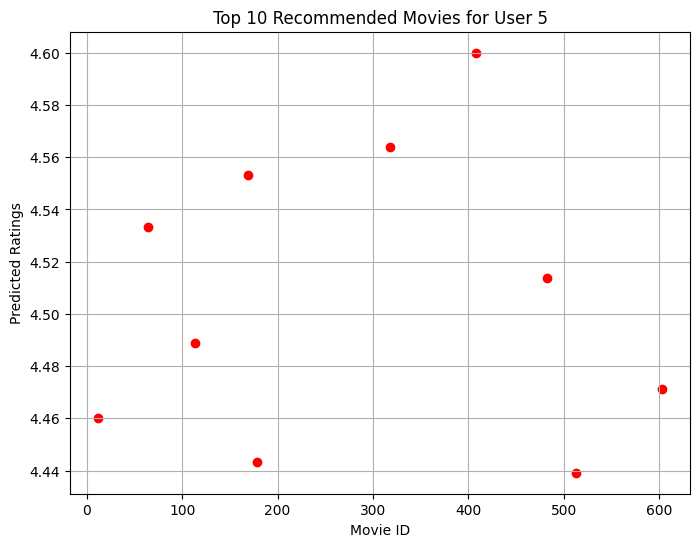

In [46]:
# Extract top N recommended movies and their predicted ratings
top_movies = [prediction.iid for prediction in predictions[:top_n]]
ratings = [prediction.est for prediction in predictions[:top_n]]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(top_movies, ratings, color='red')
plt.xlabel('Movie ID')
plt.ylabel('Predicted Ratings')
plt.title(f'Top {top_n} Recommended Movies for User {user_id}')
plt.grid(True)
plt.show()


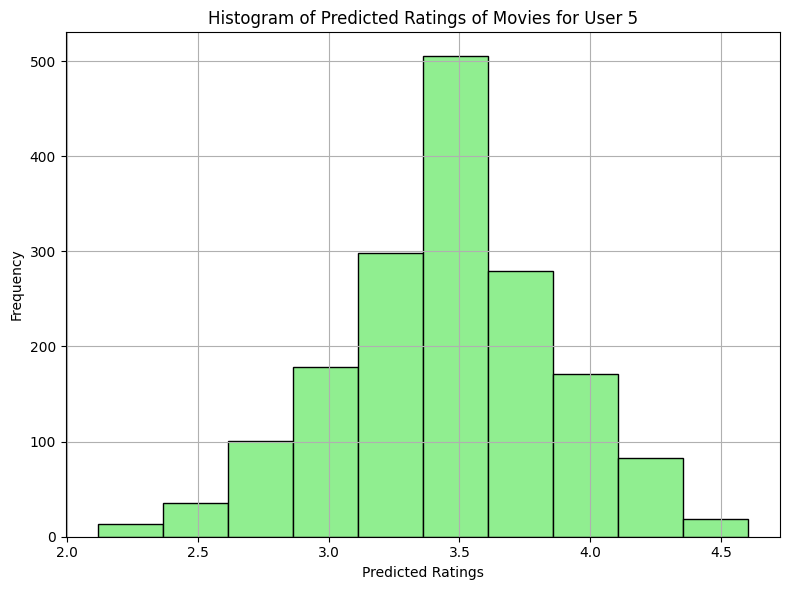

In [47]:
# Extract predicted ratings
ratings = [prediction.est for prediction in predictions]

plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.title(f'Histogram of Predicted Ratings of Movies for User {user_id}')
plt.grid(True)
plt.tight_layout()
plt.show()



## Movie Recommendation Using Manual SVD

In [48]:
import zipfile
import os
import urllib.request
import pandas as pd
import numpy as np

# Download and extract MovieLens 100K dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
urllib.request.urlretrieve(url, 'movielens.zip')

with zipfile.ZipFile('movielens.zip', 'r') as zip_ref:
    zip_ref.extractall('movielens_data_folder')

# Load MovieLens 100K dataset - u.data and u.item files
data = pd.read_csv('movielens_data_folder/ml-100k/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# Load movie information
movie_info = pd.read_csv('movielens_data_folder/ml-100k/u.item', sep='|', encoding='latin-1', header=None,
                         names=['movieId', 'movieTitle', 'releaseDate', 'videoReleaseDate', 'imdbUrl',
                                'unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime',
                                'documentary', 'drama', 'fantasy', 'filmNoir', 'horror', 'musical', 'mystery',
                                'romance', 'sciFi', 'thriller', 'war', 'western'])

# Create a user-movie rating matrix
user_movie_matrix = data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert the user-movie matrix into a NumPy array
ratings_matrix = user_movie_matrix.values

# Perform Singular Value Decomposition (SVD)
k = 100  # Number of latent factors
U, sigma, Vt = np.linalg.svd(ratings_matrix, full_matrices=False)

# Reconstruct the ratings matrix using the reduced SVD components
predicted_ratings = np.dot(np.dot(U[:, :k], np.diag(sigma[:k])), Vt[:k, :])

# Get recommendations for a specific user
target_user_id = 5  # Change this to the desired user ID
user_ratings = ratings_matrix[target_user_id - 1]  # Adjust for 0-based indexing

# Extract rated movie IDs and corresponding ratings for the user
rated_movie_ids = np.where(user_ratings > 0)[0]
rated_movie_ratings = user_ratings[user_ratings > 0]

genre_ratings = movie_info.iloc[rated_movie_ids][['action', 'adventure', 'animation', 'children', 'comedy',
                                                  'crime', 'documentary', 'drama', 'fantasy', 'filmNoir', 'horror',
                                                  'musical', 'mystery', 'romance', 'sciFi', 'thriller', 'war',
                                                  'western']].values

# Calculate the average rating for each genre based on the user's rated movies
genre_ratings_sum = np.sum(genre_ratings, axis=0)
valid_indices = np.where(genre_ratings_sum != 0)[0]  # Get indices where sum is not zero

average_genre_ratings = np.zeros(len(genre_ratings_sum))
average_genre_ratings[valid_indices] = np.sum(genre_ratings[:, valid_indices] * rated_movie_ratings.reshape(-1, 1), axis=0) / genre_ratings_sum[valid_indices]

# Predict ratings for unrated movies of similar genres
unrated_movie_ids = np.where(user_ratings == 0)[0]
unrated_movie_genres = movie_info.iloc[unrated_movie_ids][['action', 'adventure', 'animation', 'children', 'comedy',
                                                          'crime', 'documentary', 'drama', 'fantasy', 'filmNoir',
                                                          'horror', 'musical', 'mystery', 'romance', 'sciFi', 'thriller',
                                                          'war', 'western']].values


top_k = 10  # Number of top recommendations
top_movie_indices = np.argsort(predicted_user_ratings)[::-1][:top_k]
top_movies = movie_info.iloc[unrated_movie_ids].iloc[top_movie_indices]

k=[]
for prediction in predictions[:top_n]:
    movie_id = prediction.iid
    movie_title = movies_info[movies_info['movieId'] == movie_id]['title'].values[0]
    k.append(movie_title)

for _, row in top_movies.iterrows():
    genres = [genre for genre, value in row[2:].items() if value == 1]
    k.append(', '.join(genres))

print('Top 10 recommended movies for user 5:')
for i in range(9):
  print(k[i],'- Genres: ', k[i+10])
# Calculate RMSE between predicted ratings and actual ratings
nonzero_indices = ratings_matrix.nonzero()
num_entries = len(nonzero_indices[0])
rmse = np.sqrt(np.sum((predicted_ratings[nonzero_indices] - ratings_matrix[nonzero_indices]) ** 2) / num_entries)
print(f'RMSE: {rmse}')




Top 10 recommended movies for user 5:
Close Shave, A (1995) - Genres:  adventure, children, comedy, fantasy, romance, sciFi
Schindler's List (1993) - Genres:  adventure, animation, children, comedy, musical
Wrong Trousers, The (1993) - Genres:  action, adventure, comedy, horror, sciFi
Shawshank Redemption, The (1994) - Genres:  action, adventure, animation, children, fantasy
Casablanca (1942) - Genres:  adventure, animation, children, comedy, fantasy
Wallace & Gromit: The Best of Aardman Animation (1996) - Genres:  action, adventure, children, fantasy, sciFi
Rear Window (1954) - Genres:  crime, filmNoir, mystery, thriller
Usual Suspects, The (1995) - Genres:  crime, filmNoir, mystery, thriller
12 Angry Men (1957) - Genres:  action, drama, mystery, romance, thriller
RMSE: 1.5124160018775665
